In [1]:
import os
import tweepy as tw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

scrapping

In [2]:
consumer_key = "H1HAPkY6BsUBotSMtizThA7NP" 
consumer_secret = "6HMb84I01d4vCa9h7BpPtU79z3sk0vYVZfPH8R9ZjUjpGje8QJ"
access_key = "1269208732174626817-5Hfcb4CTMzVRJsSTa3cRtJm7ovC3Td"
access_secret = "xDLhzGKiVG3YWyvz8E5Rz6nChnC6XtpbotJoN8ftwVV4Q"

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)




In [4]:
tweets = tw.Cursor(api.search,
              q="hate",
              lang="en",
              since="2020-05-1").items(10)


for tweet in tweets:
    print(tweet.text)
  
    
    

RT @acnewsitics: Dear Republicans, we hate Trump like you hated President Obama.

However, we hate Trump because he is racist.

You hated O…
RT @MegsDeAngelis: reminder that come november even if you hate both candidates it doesn't mean you shouldn't vote :) please still vote for…
RT @1foreverseeking: Gosh, we're not even close to the end of the list of companies that support Antifa, Black Lives Matter, hate the polic…
RT @Aintshitjunior: i hate humans bro .. i shouldve been a bike or some shit
RT @cocoagoddess___: Y’all women not tired of being petty and messy. Damn near 30 still being childish. Hate to see it 🥴
RT @lxyzen: apparently it's not just haechan who's being attacked by s4s43ngs but also all of NCT so if you see any hate tweets about NCT,…
RT @ROBERTPATRIO: 🇺🇸🕊🇺🇸🕊 AMERICA WE HAVE SEEN SO MUCH HATE AND RAGE 
IT'S TIME FOR PRAYER 
PEACE AND HARMONY 
GOD BLESS OUR PRESIDENT DONAL…
RT @LMreaction: no, i dont think we can all just get along and sit in a circle singing kumbaya. pe

In [5]:
tweets = tw.Cursor(api.search,
              q="hate",
              lang="en",
              since="2020-05-1").items(500)
info = [[tweet.text] for tweet in tweets]

tweet_text = pd.DataFrame(data=info, 
                    columns=["tweet"])
tweet_text

,tweet
0,"RT @acnewsitics: Dear Republicans, we hate Tru..."
1,RT @MegsDeAngelis: reminder that come november...
2,"RT @1foreverseeking: Gosh, we're not even clos..."
3,RT @Aintshitjunior: i hate humans bro .. i sho...
4,RT @cocoagoddess___: Y’all women not tired of ...
...,...
495,RT @quackilly: i fucking hate it here https://...
496,Georgia State Senate: Support The Passage of G...
497,RT @iconickdramas: i didn't hate prime ministe...
498,@mantoraftaar @Curi0us_Keeda High expectations...


In [6]:
import re
import nltk

cleaning text

In [7]:
def remove(input_txt, pattern):                                          
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(lst):
    lst = np.vectorize(remove)(lst, "\r")                                  
    lst = np.vectorize(remove)(lst, "\n")
    lst = np.vectorize(remove)(lst, "RT @[\w]*:")                        
    lst = np.vectorize(remove)(lst, "@[\w]*")                             
    lst = np.vectorize(remove)(lst, "https?://[A-Za-z0-9./]*")           
    return lst

In [8]:
tweet_text['clean']= clean_tweets(tweet_text['tweet'])   #Cleaned Tweets are kept in separate coloumn clean

In [9]:
tweet_text.head()

,tweet,clean
0,"RT @acnewsitics: Dear Republicans, we hate Tru...","Dear Republicans, we hate Trump like you hate..."
1,RT @MegsDeAngelis: reminder that come november...,reminder that come november even if you hate ...
2,"RT @1foreverseeking: Gosh, we're not even clos...","Gosh, we're not even close to the end of the ..."
3,RT @Aintshitjunior: i hate humans bro .. i sho...,i hate humans bro .. i shouldve been a bike o...
4,RT @cocoagoddess___: Y’all women not tired of ...,Y’all women not tired of being petty and mess...


In [10]:
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()
tweet_text['clean'].apply(tt.tokenize)

0      [Dear, Republicans, ,, we, hate, Trump, like, ...
1      [reminder, that, come, november, even, if, you...
2      [Gosh, ,, we're, not, even, close, to, the, en...
3      [i, hate, humans, bro, .., i, shouldve, been, ...
4      [Y, ’, all, women, not, tired, of, being, pett...
                             ...                        
495                         [i, fucking, hate, it, here]
496    [Georgia, State, Senate, :, Support, The, Pass...
497    [i, didn't, hate, prime, minister, koo, so, i,...
498    [High, expectations, .., he, started, as, AAP,...
499    [i, need, y, ’, all, to, hate, imperialism, a,...
Name: clean, Length: 500, dtype: object

In [11]:
info1=tweet_text['clean'].apply(tt.tokenize)

In [12]:
df=pd.DataFrame(data=info1,columns=["clean"])
df

,clean
0,"[Dear, Republicans, ,, we, hate, Trump, like, ..."
1,"[reminder, that, come, november, even, if, you..."
2,"[Gosh, ,, we're, not, even, close, to, the, en..."
3,"[i, hate, humans, bro, .., i, shouldve, been, ..."
4,"[Y, ’, all, women, not, tired, of, being, pett..."
...,...
495,"[i, fucking, hate, it, here]"
496,"[Georgia, State, Senate, :, Support, The, Pass..."
497,"[i, didn't, hate, prime, minister, koo, so, i,..."
498,"[High, expectations, .., he, started, as, AAP,..."


In [13]:
from textblob import TextBlob

In [14]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [15]:
nltk.download('wordnet')                                                                   #words to base form
df['clean'] = df['clean'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
df['clean'].head(10)

[nltk_data] Downloading package wordnet to C:\Users\Neha
[nltk_data]     Shinkre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    Dear Republicans , we hate Trump like you hate...
1    reminder that come november even if you hate b...
2    Gosh , we're not even close to the end of the ...
3    i hate human bro .. i shouldve been a bike or ...
4    Y ’ all woman not tired of being petty and mes...
5    apparently it's not just haechan who's being a...
6    🇺 🇸 🕊 🇺 🇸 🕊 AMERICA WE HAVE SEEN SO MUCH HATE ...
7    no , i dont think we can all just get along an...
8    I got too my gut is ridiculous I hate it so mu...
9    Sanaa ’ a make me wanna a cry when I miss her ...
Name: clean, dtype: object

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer     #try

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
for sentence in tweet_text["clean"]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in ss:
        print('{0}: {1}, '.format(k, ss[k]), end='') 
    print()


[nltk_data] Downloading package vader_lexicon to C:\Users\Neha
[nltk_data]     Shinkre\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


 Dear Republicans, we hate Trump like you hated President Obama.However, we hate Trump because he is racist.You hated O…
neg: 0.466, neu: 0.383, pos: 0.15, compound: -0.9136, 
 reminder that come november even if you hate both candidates it doesn't mean you shouldn't vote :) please still vote for…
neg: 0.311, neu: 0.689, pos: 0.0, compound: -0.7988, 
 Gosh, we're not even close to the end of the list of companies that support Antifa, Black Lives Matter, hate the polic…
neg: 0.14, neu: 0.717, pos: 0.143, compound: -0.2263, 
 i hate humans bro .. i shouldve been a bike or some shit
neg: 0.477, neu: 0.523, pos: 0.0, compound: -0.8074, 
 Y’all women not tired of being petty and messy. Damn near 30 still being childish. Hate to see it 🥴
neg: 0.456, neu: 0.459, pos: 0.085, compound: -0.8589, 
 apparently it's not just haechan who's being attacked by s4s43ngs but also all of NCT so if you see any hate tweets about NCT,…
neg: 0.243, neu: 0.757, pos: 0.0, compound: -0.7935, 
 🇺🇸🕊🇺🇸🕊 AMERICA WE 

neg: 0.399, neu: 0.601, pos: 0.0, compound: -0.8074, 
 i hate humans bro .. i shouldve been a bike or some shit
neg: 0.477, neu: 0.523, pos: 0.0, compound: -0.8074, 
 Like how Trump openly says if you don’t like America pl leave , we should tell those who Hate India to just LEAVE ....!!!…
neg: 0.251, neu: 0.586, pos: 0.163, compound: -0.4037, 
I hate having good dreams n then waking up to bullshit smh
neg: 0.48, neu: 0.245, pos: 0.275, compound: -0.6369, 
    and here we go.....the left1) Attack character2) Throw hate bombs3) Have ZER…
neg: 0.405, neu: 0.595, pos: 0.0, compound: -0.7783, 
 Over half of the U.S. Senate doesn’t think this is a Hate Crime. Guess which half? 
neg: 0.356, neu: 0.644, pos: 0.0, compound: -0.802, 
 libertarians be like “look I hate the government more than anything...except minorities, support your local police”
neg: 0.176, neu: 0.524, pos: 0.3, compound: 0.1531, 
 Her hair and nails are FABULOUS... I hate the tee shirt because it’s mass produced and we CAN b

In [17]:
from textblob import TextBlob                                               #polarrity -:negative +:positive &subjectivity
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df['polarity'] = df['clean'].apply(polarity)
df['subjectivity'] = df['clean'].apply(subjectivity)


In [18]:
df


,clean,polarity,subjectivity
0,"Dear Republicans , we hate Trump like you hate...",-0.850000,0.800000
1,reminder that come november even if you hate b...,-0.204167,0.862500
2,"Gosh , we're not even close to the end of the ...",-0.483333,0.666667
3,i hate human bro .. i shouldve been a bike or ...,-0.333333,0.600000
4,Y ’ all woman not tired of being petty and mes...,-0.180000,0.640000
...,...,...,...
495,i fucking hate it here,-0.800000,0.900000
496,Georgia State Senate : Support The Passage of ...,-1.000000,0.900000
497,i didn't hate prime minister koo so i felt rea...,-0.666667,0.700000
498,High expectation .. he started a AAP mla . Ek ...,0.160000,0.540000


In [19]:
def ratio(x):                                                              #0 neutral 1:pos -1:neg
 if x > 0:
   return 1
 elif x == 0:
   return 0
 else:
   return -1
df['result'] = df['polarity'].apply(ratio)

In [20]:
df.head()

,clean,polarity,subjectivity,result
0,"Dear Republicans , we hate Trump like you hate...",-0.850000,0.800000,-1
1,reminder that come november even if you hate b...,-0.204167,0.862500,-1
2,"Gosh , we're not even close to the end of the ...",-0.483333,0.666667,-1
3,i hate human bro .. i shouldve been a bike or ...,-0.333333,0.600000,-1
4,Y ’ all woman not tired of being petty and mes...,-0.180000,0.640000,-1


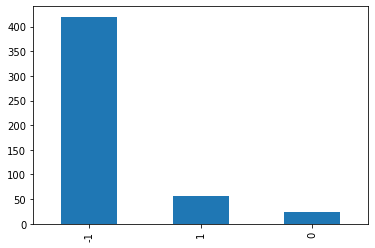

In [21]:
df['result'].value_counts().plot(kind = 'bar')
plt.show()

In [22]:
#0:neither 1:non-toxic -1:toxic(negative tweets)